In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data taken from Kaggle_diabetes_012_health_indicators_BRFSS2015

In [3]:
df = pd.read_csv(r'dataset\diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Check if there is missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [6]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [12]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y, random_state=0, test_size=0.2)

In [14]:
from sklearn.ensemble import RandomForestClassifier

## Use RandomizedSearchCV to randomly check the best combination of hyper-parameters

In [17]:
param_distributions = {'n_estimators':[20,60,100,140],'min_samples_split':[10,20,30,60,100,150],'criterion':['gini','entropy', 'log_loss']}

rand = RandomizedSearchCV(RandomForestClassifier(),param_distributions)

In [19]:
rand.fit(xtrain, ytrain)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'min_samples_split': [10, 20, 30, 60,
                                                              100, 150],
                                        'n_estimators': [20, 60, 100, 140]})

In [20]:
rand.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_split=60)

The best Paramaters shown below

In [25]:
rand.best_params_

{'n_estimators': 100, 'min_samples_split': 60, 'criterion': 'entropy'}

Iterated 10 times and below is thier score

<Axes: >

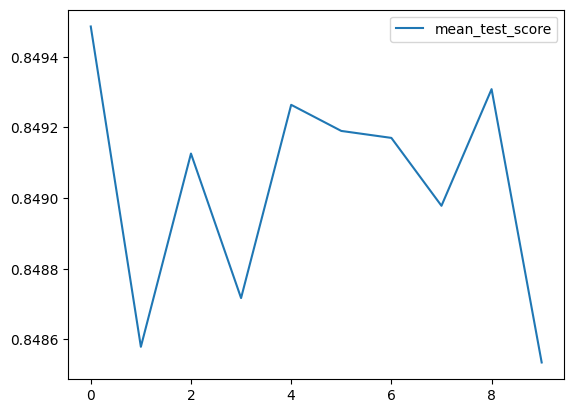

In [34]:
result = rand.cv_results_
resultdf = pd.DataFrame(result)
resultdf.plot(y='mean_test_score')

<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

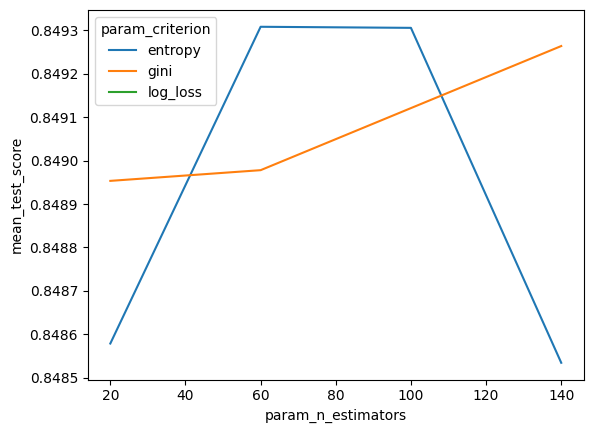

In [36]:
sns.lineplot(data=resultdf,x='param_n_estimators',y='mean_test_score',hue='param_criterion',errorbar=None)

In [30]:
resultdf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.191908,1.439190,1.128269,0.236080,100,60,entropy,"{'n_estimators': 100, 'min_samples_split': 60,...",0.850230,0.848062,0.850230,0.850649,0.848256,0.849486,0.001096,1
1,4.691755,0.315397,0.242505,0.046905,20,30,entropy,"{'n_estimators': 20, 'min_samples_split': 30, ...",0.850280,0.846978,0.849910,0.848826,0.846901,0.848579,0.001422,9
2,13.230394,2.730420,0.693204,0.095314,100,150,entropy,"{'n_estimators': 100, 'min_samples_split': 150...",0.850058,0.847841,0.849368,0.850132,0.848231,0.849126,0.000937,6
3,2.639723,0.348929,0.153835,0.007584,20,30,gini,"{'n_estimators': 20, 'min_samples_split': 30, ...",0.849393,0.847496,0.849442,0.849319,0.847935,0.848717,0.000830,8
4,15.139712,0.562277,0.863541,0.047125,140,100,gini,"{'n_estimators': 140, 'min_samples_split': 100...",0.850403,0.847742,0.849319,0.850009,0.848847,0.849264,0.000932,3
5,2.180898,0.109885,0.140242,0.023589,20,100,gini,"{'n_estimators': 20, 'min_samples_split': 100,...",0.849565,0.847422,0.849614,0.850477,0.848872,0.849190,0.001020,4
6,13.729463,0.578355,0.776897,0.056393,100,30,log_loss,"{'n_estimators': 100, 'min_samples_split': 30,...",0.850033,0.847988,0.849541,0.850501,0.847788,0.849170,0.001092,5
7,6.219882,0.419573,0.384640,0.038760,60,150,gini,"{'n_estimators': 60, 'min_samples_split': 150,...",0.850132,0.847717,0.849541,0.849738,0.847763,0.848978,0.001029,7
8,6.955384,0.761905,0.396907,0.037364,60,100,entropy,"{'n_estimators': 60, 'min_samples_split': 100,...",0.850452,0.847964,0.849368,0.850255,0.848502,0.849308,0.000966,2
9,23.713060,0.537436,1.346988,0.202280,140,10,entropy,"{'n_estimators': 140, 'min_samples_split': 10,...",0.850181,0.846683,0.848506,0.849738,0.847566,0.848535,0.001306,10


In [38]:
randbest = RandomForestClassifier(
    n_estimators=100, min_samples_split=60, criterion='entropy'
)

In [39]:
randpredict = randbest.fit(xtrain, ytrain).predict(xtest)

In [42]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [90]:
print(f'precision_score is {precision_score(ytest,randpredict,average=None,zero_division=0)}')
print(f'recall_score is {recall_score(ytest,randpredict,average=None,zero_division=0)}')

precision_score is [0.85635708 0.         0.61067314]
recall_score is [0.98636694 0.         0.13964776]


In [72]:
ytest.value_counts()

Diabetes_012
0.0    42617
2.0     7211
1.0      908
Name: count, dtype: int64

## Conclusion from precision and recall <br> precision_score shows during prediction 86% 0 and 61% 2 were correctly predicted <br> recall_score shows 99% and 14% 0 and 2 were correctly predict <br> None 1 is correctly predicted

Text(0.5, 1.0, 'Divided By All Tested Data')

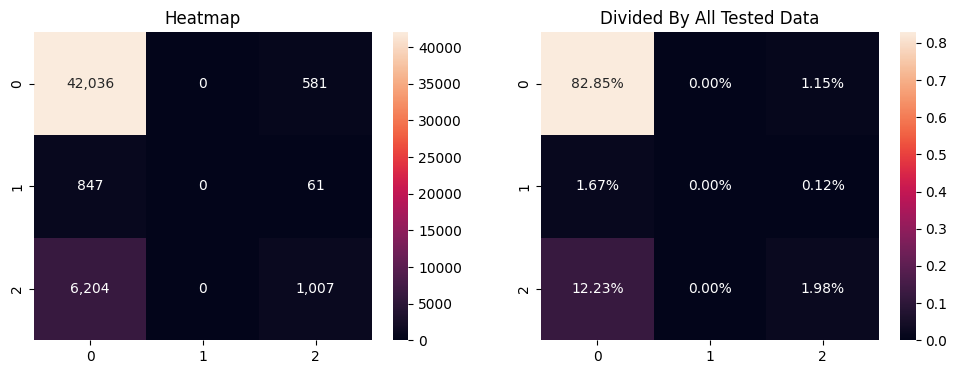

In [97]:
cm = confusion_matrix(ytest,randpredict)
fig,axes = plt.subplots(1,2,figsize=(12,4))
sns.heatmap(cm,annot=True,fmt=',',ax=axes[0])
sns.heatmap(cm/len(ytest),annot=True,fmt='.2%',ax=axes[1])
axes[0].set_title('Heatmap')
axes[1].set_title('Divided By All Tested Data')

## Start XGB Classifier

In [53]:
from xgboost import XGBClassifier

In [54]:
param_distributions = {'n_estimators':[20,60,100,140],'max_leaves':[20,60,100,140],'learning_rate':[0.1,0.2,0.3,0.5]}
randXGB = RandomizedSearchCV(XGBClassifier(),param_distributions)

In [55]:
randXGB.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.5],
                                        'max_leaves': [20, 60, 100, 140],
                                        'n_estimators': [20, 60, 100, 140]})

## Best Parameters are below

In [56]:
randXGB.best_params_

{'n_estimators': 100, 'max_leaves': 60, 'learning_rate': 0.1}

In [59]:
XGBresult = randXGB.cv_results_
XGBresultdf = pd.DataFrame(XGBresult)
XGBresultdf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_leaves,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.011997,0.155511,0.032657,0.002800,20,20,0.1,"{'n_estimators': 20, 'max_leaves': 20, 'learni...",0.849491,0.847175,0.849097,0.848580,0.847640,0.848397,0.000870,9
1,1.101278,0.156653,0.035200,0.006552,20,60,0.2,"{'n_estimators': 20, 'max_leaves': 60, 'learni...",0.850994,0.847964,0.849565,0.849959,0.848896,0.849476,0.001017,7
2,5.349973,0.388282,0.097408,0.004719,140,140,0.3,"{'n_estimators': 140, 'max_leaves': 140, 'lear...",0.850575,0.846214,0.848456,0.848752,0.846974,0.848195,0.001514,10
3,2.920061,0.222237,0.069186,0.009623,60,140,0.1,"{'n_estimators': 60, 'max_leaves': 140, 'learn...",0.851216,0.847742,0.850058,0.851117,0.848256,0.849678,0.001439,4
4,4.051384,0.357270,0.099140,0.013219,100,20,0.5,"{'n_estimators': 100, 'max_leaves': 20, 'learn...",0.850674,0.846954,0.850107,0.849984,0.847714,0.849086,0.001470,8
5,6.743430,0.568209,0.134947,0.012837,140,60,0.1,"{'n_estimators': 140, 'max_leaves': 60, 'learn...",0.850896,0.847594,0.850674,0.850698,0.848724,0.849717,0.001324,3
6,4.969285,0.633958,0.105925,0.014624,100,60,0.1,"{'n_estimators': 100, 'max_leaves': 60, 'learn...",0.851487,0.848038,0.851216,0.851610,0.848601,0.850190,0.001543,1
7,4.145113,0.468194,0.102362,0.018121,140,20,0.3,"{'n_estimators': 140, 'max_leaves': 20, 'learn...",0.851068,0.847323,0.850230,0.850304,0.848995,0.849584,0.001311,6
8,3.531680,0.240012,0.088666,0.010087,100,100,0.2,"{'n_estimators': 100, 'max_leaves': 100, 'lear...",0.851635,0.847397,0.850501,0.850575,0.847960,0.849614,0.001640,5
9,0.981653,0.130803,0.037263,0.006330,20,140,0.3,"{'n_estimators': 20, 'max_leaves': 140, 'learn...",0.851906,0.847767,0.850403,0.850822,0.848157,0.849811,0.001592,2


<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

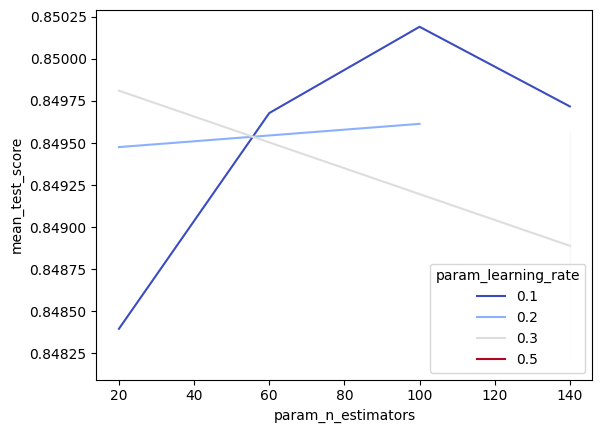

In [62]:
sns.lineplot(XGBresultdf, x='param_n_estimators', y='mean_test_score', hue='param_learning_rate',palette='coolwarm')

In [63]:
XGBbest = XGBClassifier(
    n_estimators=100, max_leaves=60, learning_rate=0.1
)

In [67]:
XGBpredict = XGBbest.fit(xtrain,ytrain).predict(xtest)

In [89]:
print(f'precision_score is {precision_score(ytest,XGBpredict,average=None,zero_division=0)}')
print(f'recall_score is {recall_score(ytest,XGBpredict,average=None,zero_division=0)}')

precision_score is [0.86192235 0.         0.58599562]
recall_score is [0.97991412 0.         0.18568853]


In [69]:
ytest.value_counts()

Diabetes_012
0.0    42617
2.0     7211
1.0      908
Name: count, dtype: int64

## Conclusion from precision and recall <br> precision_score shows during prediction 86% 0 and 59% 2 were correctly predicted <br> recall_score shows 99% and 19% 0 and 2 were correctly predict <br> None 1 is correctly predicted

Text(0.5, 1.0, 'Divided By All Tested Data')

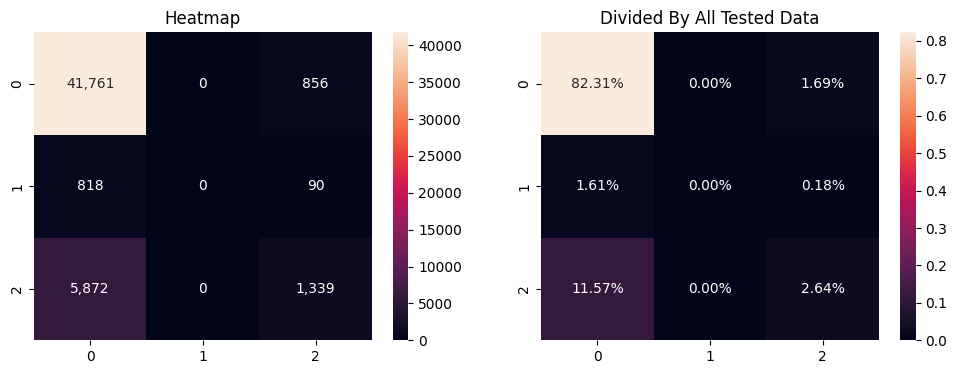

In [99]:
cmxgb = confusion_matrix(ytest,XGBpredict)
fig,axes = plt.subplots(1,2,figsize=(12,4))
sns.heatmap(cmxgb,annot=True,fmt=',',ax=axes[0])
sns.heatmap(cmxgb/len(ytest),annot=True,fmt='.2%',ax=axes[1])
axes[0].set_title('Heatmap')
axes[1].set_title('Divided By All Tested Data')